# Day 12: Implementin a Simplified Attention Mechanism in Python 
## What is Attention? 
- Imagine we are in a room with five people, and we are trying to understand what is going on. 
- We don't pay equal attention to all five people, we naturally focus more on the person who's talking about something relevant. 
- That's exactly what attention does for LLMs. When reading a sentence, the model "pays more attention" to the words that are important for understanding the context. 
- Let's break it down with a simple example and real code! 

### Our Example: "Cats love cozy windows" 
- Each word will be turned into a vector, just a bunch of numbers that represent the meaning of the word. 
- Here's what out made-up word vectors look like: 
- 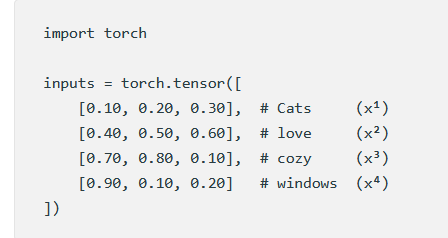
- Each row is an embedding for a word, just another way of saving, "this is how the model understands the meaning of the word in numbers". 

In [3]:
import torch 

inputs = torch.tensor([
    [0.10, 0.20, 0.30],  # Cats     (x¹)
    [0.40, 0.50, 0.60],  # love     (x²)
    [0.70, 0.80, 0.10],  # cozy     (x³)
    [0.90, 0.10, 0.20]   # windows  (x⁴)
])

### 1. Calculating Attention Scores (How Similar Are These Words?)
- Let's say we want to find out how much attention the word "love" (second word) should pay to all the others. 
- We do that by computing the dot product between the vector for "love" and the others. 
- The higher the score, the more related they are.

In [4]:
query = inputs[1] # Embedding for "love"

attn_scores = torch.empty(inputs.shape[0])
for i, x_i in enumerate(inputs):
    attn_scores[i] = torch.dot(query, x_i)

print(attn_scores)

tensor([0.3200, 0.7700, 0.7400, 0.5300])


In [5]:
# Or, even faster, do it for all words at once using matrix multiplication: 
attn_scores_all = inputs @ inputs.T
print(attn_scores)

tensor([0.3200, 0.7700, 0.7400, 0.5300])


- This gives us a matrix of similarities, each number tells how strongly one word is related to another. 

### 2: Turning Scores into Meaningful Weights (Using Softmax)
- Raw scores are hard to interpret. We want to turn them into weights between 0 and 1 that add up to 1 for each word. 
- This tells us the percentage of focus each word should get. 
- We use the softmax function to do this: 

In [6]:
attn_weights = torch.softmax(attn_scores_all, dim=1)
print(attn_weights)

tensor([[0.2296, 0.2749, 0.2589, 0.2366],
        [0.1878, 0.2946, 0.2859, 0.2317],
        [0.1509, 0.2439, 0.3638, 0.2414],
        [0.1619, 0.2320, 0.2834, 0.3227]])


- Now every row in this matrix shows how much attention one word gives  to all the others. 
- For instance, row 2 tells us how much "love" attends to "Cats", "cozy" and "window". 

### Creating a Context Vector (Thi Final Mix)
- Here's the cool part. 
- Each word's final understanding (called a context vector) is calculated by mixing all word vectors together, based on the attention weights. 
- If "love" pays 70% attention to "Cats" and %30 to "cozy", the context vector will be a blend of those two wod vectors. 
- Let's do it manually for "love" (row 2): 

In [8]:
attn_weights_love = attn_weights[1]

context_vec_love = torch.zeros_like(inputs[0])
for i, x_i in enumerate(inputs):
    context_vec_love += attn_weights_love[i] * x_i

print(context_vec_love)

tensor([0.5453, 0.4367, 0.3080])


In [9]:
# Or faster, do it for all words at once: 
context_vectors = attn_weights @ inputs
print(context_vectors)

tensor([[0.5271, 0.4141, 0.3070],
        [0.5453, 0.4367, 0.3080],
        [0.5846, 0.4673, 0.2763],
        [0.5978, 0.4074, 0.2807]])


- Each row now holds a new version of the word that includes information from the whole sentence. 

## Why Does This Matter? 
- This mechanism helps LLMs: 
    - Understand context: It's not just "what" a word is but how it fits in the sentence. 
    - Be smarter with predictions: It can now decide that "windows" is important because "cats love cozy windows". 
    - Handle longer sentences: Attention lets the model scale and stay relevant, even with lots of words. 

### TL;DR 
- The attention mechanism in LLMs: 
    1. Calculates how similar each word is to every other word. 
    2. Converts those scores into weights (softmax).
    3. Build a new vector for each word using those weights (context vector). 
- This simple trick is the backbone of how modern Transformers work, letting them read, and generate human-like text. 